In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,10]
import librosa
import librosa.display
import IPython.display as ipd

from pydub import AudioSegment
from pydub.utils import mediainfo


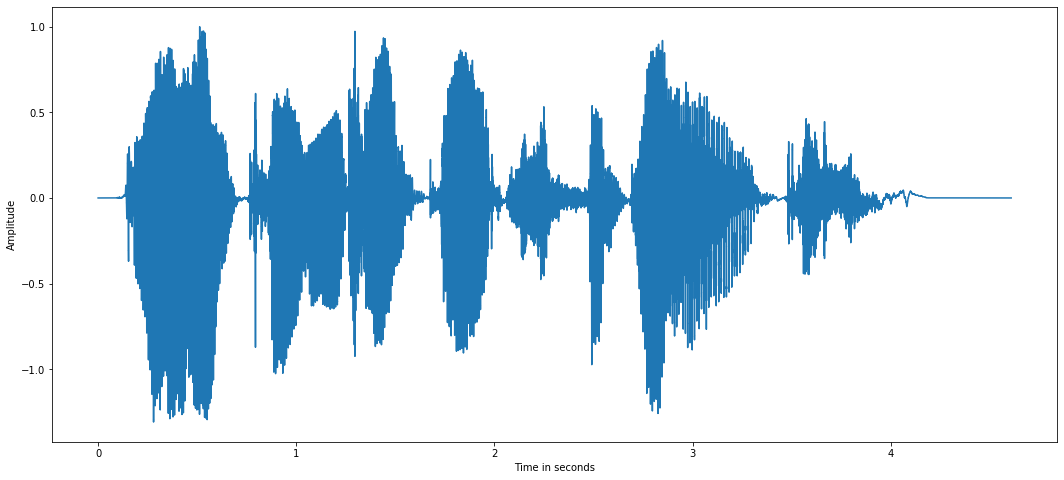

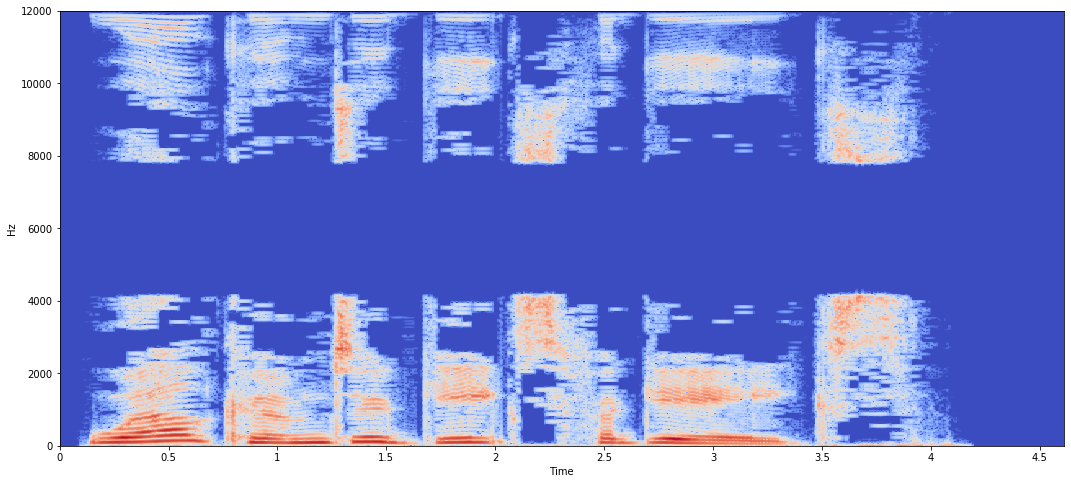

In [6]:
# Path to arctic_a0005: 'will we ever forget it'
speech_path = 'C:/Users/jayaj/welcome224.wav'
sound = AudioSegment.from_wav(speech_path)  # Read audio file
sound_samples = sound.get_array_of_samples()  # Extract signal samples
samp_freq = sound.frame_rate  # Sampling frequency

# Normilze to max amplitude of 1
speech_samples_norm = np.array(sound_samples)/np.max(np.array(sound_samples))

strt_samp = 0
end_samp = len(speech_samples_norm)
end_ms = len(speech_samples_norm)/samp_freq

xrange = np.linspace(0, end_ms, end_samp-strt_samp)

# Plot speech and the corresponding spectrogram
fg1 = plt.figure(figsize=(18, 8))
plt.plot(xrange, speech_samples_norm)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.axis('tight')

fg1.savefig('speech.jpg')

winlen = int(samp_freq*.03)  # Window size of 30 ms
X = librosa.stft(
    np.array(speech_samples_norm[strt_samp:end_samp]), win_length=winlen)
Xdb = librosa.amplitude_to_db(abs(X))
fg2 = plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=samp_freq, x_axis='time',
                         y_axis='hz', hop_length=winlen/4)

fg2.savefig('specgram.jpg')

In [7]:
# Read lab file
fil = open('../../../Data/speech/cmu_us_rms_arctic/lab/arctic_a0005.lab')

phonemes = []
for sent in fil.readlines():
    wrds = sent.split()
    if len(wrds) > 1:
        phonemes.append([float(wrds[0]), wrds[2]])

FileNotFoundError: [Errno 2] No such file or directory: '../../../Data/speech/cmu_us_rms_arctic/lab/arctic_a0005.lab'

In [ ]:
# Phoneme list and their ending point
phonemes

In [ ]:
# Plot wave file along with range of phonemes to print
nophn = 2

col = ['r', 'b']
ind = 0
fg1 = plt.figure(figsize=(14, 5))
stmx = []
stmy = []
for i in range(0, nophn+1):
    strt_s = phonemes[i][0]
    end_s = phonemes[i+1][0]
    xrange = np.linspace(strt_s, end_s, int(
        (end_s)*samp_freq)-int((strt_s)*samp_freq))
    plt.plot(xrange, speech_samples_norm[int(
        strt_s*samp_freq):int(end_s*samp_freq)], col[ind])

    ind = 1-ind
    stmx.append(end_s)
    stmy.append(1.1)
    plt.text((strt_s+end_s)/2, 1, phonemes[i+1][1], fontsize=12)

plt.stem(stmx, stmy, 'k')
plt.grid()
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

fg1.savefig('willphn.jpg')

In [ ]:
# Read noise file

s = '../../../Data/speech/Noisex92/factory1.wav'
sound = AudioSegment.from_wav(s)

soundall = sound.get_array_of_samples()
# Sampling rate of noise
samp_freq_nois = sound.frame_rate
# NOise samples
soundallnois = np.array(soundall)/np.max(np.array(soundall))

In [ ]:
# Play  speech files
ipd.Audio(speech_samples_norm, rate=int(samp_freq))

In [ ]:
# PLay noise file before resampling
ipd.Audio(soundallnois, rate=int(samp_freq_nois))

In [ ]:
# Resample noise file to sampling rate of speech
soundallnoisresamp = librosa.core.resample(
    soundallnois, samp_freq_nois, samp_freq)

In [ ]:
# PLay noise file after resampling

ipd.Audio(soundallnoisresamp,rate=int(samp_freq))

In [ ]:
# Select noise samples with same length as speech samples
soundnoissel = soundallnoisresamp[0:len(speech_samples_norm)]

In [ ]:
# Calculate the energy of speech and noise signal
enerspeech = np.sum(np.multiply(speech_samples_norm, speech_samples_norm))
enernois = np.sum(np.multiply(soundnoissel, soundnoissel))

In [ ]:
# Normalize the noise samples such that noise energy is same as speech energy
soundnoisselnorm = soundnoissel*np.sqrt(enerspeech/enernois)

In [ ]:
# Add speech and noise and plot

strt_samp = 0
end_samp = len(speech_samples_norm)
end_ms = len(speech_samples_norm)/samp_freq

xrange = np.linspace(0, end_ms, end_samp-strt_samp)

fg1 = plt.figure(figsize=(18, 8))
plt.plot(xrange, soundnoisselnorm)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('Factory noise')

fg1.savefig('factory1.jpg')

noisyspeech = soundnoisselnorm+speech_samples_norm
fg1 = plt.figure(figsize=(18, 8))
plt.plot(xrange, noisyspeech)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('Noisy speech')

fg1.savefig('noisyspeech.jpg')

winlen = int(samp_freq*.03)
X = librosa.stft(
    np.array(soundnoisselnorm[strt_samp:end_samp]), win_length=winlen)
Xdb = librosa.amplitude_to_db(abs(X))
fg2 = plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=samp_freq, x_axis='time',
                         y_axis='hz', hop_length=winlen/4)
plt.title('Log scaled spectrogram of factory noise using a window size of 30 ms and hop size of 7.5 ms')

fg2.savefig('specgramnoise.jpg')

X = librosa.stft(np.array(noisyspeech[strt_samp:end_samp]), win_length=winlen)
Xdb = librosa.amplitude_to_db(abs(X))
fg2 = plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=samp_freq, x_axis='time',
                         y_axis='hz', hop_length=winlen/4)
plt.title('Log scaled spectrogram of noisy speech using a window size of 30 ms and hop size of 7.5 ms')

fg2.savefig('specgramnoisyspeech.jpg')

In [ ]:
# Play Noisy speech
ipd.Audio(noisyspeech, rate=int(samp_freq))

In [ ]:
# Function to find short term energy

def short_term_energy(sig, winlen, fs):
    winsamp = int(winlen*fs)
    stesig = np.zeros((len(sig)))
    for ind in range(int(winsamp/2), int(len(sig)-winsamp/2)):
        sig_segment = sig[int(ind-winsamp/2):int(ind+winsamp/2)]
        stesig[ind] = np.sum(np.multiply(sig_segment, sig_segment))

    return stesig

In [ ]:
# Compute short term energy

winlen = .02  # Window length of 20 ms
stesig = short_term_energy(speech_samples_norm, winlen, samp_freq)

In [ ]:
# PLot short term energy
strt_samp = 0
end_samp = len(speech_samples_norm)
end_ms = len(speech_samples_norm)/samp_freq

xrange = np.linspace(0, end_ms, end_samp-strt_samp)

fg1 = plt.figure(figsize=(18, 8))

plt.plot(xrange, stesig)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.grid()
# plt.axis([.75,.8,0,.01])

fg1.savefig('ste_speech.jpg')

In [ ]:
# Find silence regions and show in plot

# Average short term energy in the whole speech signal
avgsig = np.mean(stesig)


silen = [i for i, v in enumerate(stesig) if v < avgsig*10**(-4)]
silen = np.array(silen)
strt_samp = 0
end_samp = len(speech_samples_norm)
end_ms = len(speech_samples_norm)/samp_freq

xrange = np.linspace(0, end_ms, end_samp-strt_samp)

fg1 = plt.figure(figsize=(18, 8))

plt.plot(xrange, speech_samples_norm)

plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.grid()

# Silence regions
silen_val = np.ones((len(silen)))*0.5
plt.plot(silen/samp_freq, silen_val, 'r*')
plt.legend(['Speech signal', 'Silence segments'])
# plt.axis([.75,.8,-1,1])
fg1.savefig('silen_speech.jpg')